# Linear Regression : 선형 회귀

### Module Import

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from W2_resource.utils import *
import copy
import math
%matplotlib inline

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
# load the dataset
x_train, y_train = load_data()

### 데이터 shape, type 보기

In [6]:
print("x_train 형태:",x_train.shape)
print("y_train 형태:", y_train.shape)
print("x_train Type:",type(x_train))
print("y_train Type:",type(y_train))
print("x_train 5개 미리보기:", x_train[:5])
print("y_train 5개 미리보기:", y_train[:5])

x_train 형태: (97,)
y_train 형태: (97,)
x_train Type: <class 'numpy.ndarray'>
y_train Type: <class 'numpy.ndarray'>
x_train 5개 미리보기: [6.1101 5.5277 8.5186 7.0032 5.8598]
y_train 5개 미리보기: [17.592   9.1302 13.662  11.854   6.8233]


* 산점도 그리기
    * marker 파라미터를 바꾸면 마커의 모양이 바뀜
    * c 파라미터를 바꾸면 마커의 색상이 바뀜

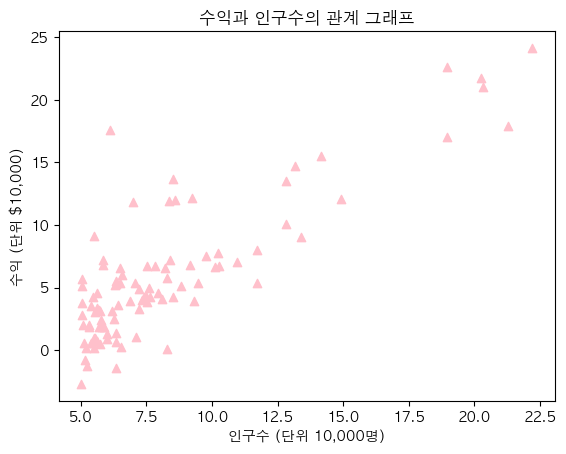

In [7]:
plt.scatter(x_train, y_train, marker='^', c='pink') 

# plot 제목
plt.title("수익과 인구수의 관계 그래프")
# y축 제목
plt.ylabel('수익 (단위 $10,000)')
# x축 제목
plt.xlabel('인구수 (단위 10,000명)')
plt.show()

---

## 비용함수 (Cost function) 계산하기

### 1. 선형 회귀식 
> 1차식 형태. 선형
$$f_{wb}(x^{(i)}) =  wx^{(i)} + b$$

### 2. 오차(=비용) 계산식 
> 오차가 -, + 섞여 있으면 상쇄되어서 사라질 수 있으니까 제곱해주고 합해준다
$$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$

### 3. 비용함수 
> 오차 제곱합의 평균 * 2
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$


In [8]:
def compute_cost(x, y, w, b):
    '''
    선형 회귀를 위한 비용함수 계산

    Args :
        x (array) : (m,) 형태로 독립변수 (원인 - input) vector [...]
        y (array) : (m,) 형태로 종속변수 (결과 - label) vector [...]
        w, b (scalar) : cost 함수의 파라미터 

    Returns :
        total_cost (float) : j(w,b)의 값. 
                            모든 경우의 오차(error = cost = loss) 제곱의 총 합계 / m(개) * 2. 
                            오차 제곱의 평균.
    '''
    # 훈련 데이터의 개수 (examples의 수)
    m = x.shape[0] 

    # 오차 제곱합
    cost = 0
    for i in range(m):
        cost += ((w*x[i] + b) - y[i])**2 # (wx+b)-y : 예측값-실제값
    
    # 오차 제곱합의 평균 * 2 (2를 곱하는건 차후에 경사하강법 계산을 용이하게 하기 위해서)
    total_cost = cost / (2*m)

    return total_cost


In [9]:
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

# Public tests
from W2_resource.public_tests import *
compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w: 75.203
All tests passed!


---

## 경사하강법 계산하기

### 1. 파라미터 업데이트
> w는 기울기, b는 y절편
>
> 경사하강법이란 1차식의 형태인 선형 회귀식의 기울기와 y절편을 계속 업데이트 해줘서 
>
> 최적의 값을 찾는 (=오차가 가장 적게 되는 w, b를 찾는) 방법

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

* 해석
    * 기존 w - Cost 함수를 w를 기준으로 편미분한 결과 -> 새로운 w 적용
    *  기존 b - Cost 함수를 b를 기준으로 편미분한 결과 -> 새로운 b 적용
    
    -> 오차함수가 최소 지점이 될 때까지 반복

In [53]:
def compute_gradient(x, y, w, b): 
    '''
    비용을 최소로 하는 값을 찾기 위한 경사하강법

    Args :
        x (array) : (m,) 형태로 독립변수 (원인 - input) vector [...]
        y (array) : (m,) 형태로 종속변수 (결과 - label) vector [...]
        w, b (scalar) : 경사하강 함수의 파라미터 

    Returns :
        dj_dw (scalar) : 파라미터 w의 최적의 값
        dj_db (scalar) : 파라미터 b의 최적의 값
    '''

    # 훈련 데이터의 개수 (examples의 수)
    m = x.shape[0] 

    dj_dw = np.sum((((w*x+b)-y))*x)/m
    dj_db = np.sum(((w*x) + b)-y)/m
    
    return dj_dw, dj_db

In [54]:
# 0부터 시작하는 TEST
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w, b (zeros): -65.32884974555671 -5.839135051546393
Using X with shape (4, 1)
All tests passed!


In [55]:
# 0.2부터 시작하는 TEST
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114433 -4.007175051546392


### 배치 경사하강을 이용한 파라미터 학습

> 배치 경사 하강을 이용해 한번에 모든 예제를 돌려 최적의 파라미터를 찾을 수 있다.
- 경사 하강이 잘 작동되는지 확인하기 위해서는 $J(w,b)$를 확인해 매번 감소하는지 보면 된다.
- 학습률 (learning rate)가 적절한 경우 $J(w,b)$는 계속 감소할 것이다.

In [56]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    '''
    Args:
      x (array), y (array)
      w_in, b_in (scalar)
      cost_function: 정의된 비용함수
      gradient_function: 정의된 경사하강 함수
      alpha (float) : 학습률. Learning rate
      num_iters (int) : 경사하강을 얼마나 반복할 것인지 횟수
    Returns:
      w (ndarray): 최종 업데이트 된 w값 전체
      b (scalar): 최종 업데이트 된 b값
    '''

    m = len(x)

    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  # 함수 내 w가 전역변수로 수정됨을 방지
    b = b_in

    for i in range(num_iters):

        # 경사하강 계산 -> 파라미터 업데이트할 값 나옴
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # 기존 w,b 값에 업데이트할 값을 빼서 새로운 w,b 반영
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # 반복 작업 단축?
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # 10번 반복될 때마다 cost를 출력
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history

In [58]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("경사 하강으로 찾은 w, b 값:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
경사 하강으로 찾은 w, b 값: 1.166362350335582 -3.6302914394043597


### 최종 w, b 값을 반영한 Plot 그려보기

In [61]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

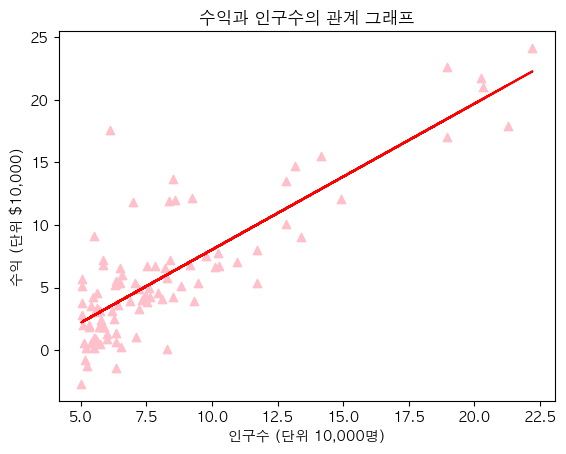

In [64]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "r")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='^', c='pink') 

# plot 제목
plt.title("수익과 인구수의 관계 그래프")
# y축 제목
plt.ylabel('수익 (단위 $10,000)')
# x축 제목
plt.xlabel('인구수 (단위 10,000명)')
plt.show()

---

### 선형회귀식을 이용해서 예측한 결과 확인해보기

In [65]:
# 인구수가 3.5일때 수익은?
predict1 = 3.5 * w + b
print('인구수 = 35,000 일때, 우리가 예측한 이익은 $%.2f' % (predict1*10000))

# 인구수가 7.0일때 수익은?
predict2 = 7.0 * w + b
print('인구수 = 70,000 일때, 우리가 예측한 이익은 $%.2f' % (predict2*10000))

인구수 = 35,000 일때, 우리가 예측한 이익은 $4519.77
인구수 = 70,000 일때, 우리가 예측한 이익은 $45342.45
